In [104]:
# Step 1: Install Necessary Functions 
!pip install Pillow
!pip install opencv-python
!pip install scipy
!pip install ripser

from PIL import Image
import cv2
import glob
from scipy.interpolate import interp2d
#warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
from scipy.interpolate import CubicSpline
from ripser import ripser 
from persim import plot_diagrams
from time import time

from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import os
from pathlib import Path

from scipy import interpolate


In [105]:
#Step 2: Load Video Function 
def loadVideo(filepath):
    vid = cv2.VideoCapture(filepath)
    _, image = vid.read()
    count = 0
    success = True
    n_row, n_col, _ = image.shape
    data = []
    while success:
        data.append(image.flatten()) 
        success,image = vid.read()
        count += 1
    vid.release() 
    data = np.array(data)
   # print(count, " frames extracted")
    #print("frame size = ", (n_row , n_col))
    #print("data shape =", data.shape)
    return data , (n_row, n_col)

In [106]:
#Step3: Load Video Frames 
def video_to_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Read the video frame by frame
    frame_count = 0
    while video.isOpened():
        ret, frame = video.read()

        if not ret:
            break

        # Save the frame as an image
        output_path = os.path.join(output_folder, f'frame{frame_count}.jpg')
        cv2.imwrite(output_path, frame)

        frame_count += 1

    # Release the video file
    video.release()
    

In [107]:
#Step 4: Loading Frame 
def loadFrame(framefilepath): 
    image_path = framefilepath
    image = cv2.imread(image_path)
    
    # Split the image into RGB channels
    blue_channel, green_channel, red_channel = cv2.split(image)
    
    ## Display the original and separated channels
    #fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    #axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #axes[0, 0].set_title("Original Image")
    #axes[0, 0].axis("off")
    #axes[0, 1].imshow(blue_channel, cmap='gray')
    #axes[0, 1].set_title("Blue Channel")
    #axes[0, 1].axis("off")
    #axes[1, 0].imshow(green_channel, cmap='gray')
    #axes[1, 0].set_title("Green Channel")
    #axes[1, 0].axis("off")
    #axes[1, 1].imshow(red_channel, cmap='gray')
    #axes[1, 1].set_title("Red Channel")
    #axes[1, 1].axis("off")

    #plt.tight_layout()
    #plt.show()

    pixels = image.reshape(-1, 3)
    
    return pixels 

In [108]:
folder_path = "C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA"

# Get a list of file names in the folder
file_names = os.listdir(folder_path)

# Define the custom sorting key function
def get_file_number(file_path):
    # Extract the number from the file name
    try:
        file_name = os.path.basename(file_path)  # Extract the file name from the full path
        number = int(file_name.split('.')[0].replace('frame', ''))  # Assuming the number is before the file extension
    except ValueError:
        number = float('inf')  # Assign a high value if the file name doesn't contain a number
    return number
# Sort the file names based on the custom sorting key
sorted_file_names = sorted(file_names, key=get_file_number)

filepath_list=[]
# Iterate over the sorted file names
for file_name in sorted_file_names:
    file_path = os.path.join(folder_path, file_name)
    #new_file_path = file_path.replace('\\', '\\\\')  # Add an extra backslash to each backslash
    filepath_list.append(file_path)
filepath_array=np.array(filepath_list)

print(filepath_array)

['C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame0.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame1.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame2.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame3.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame4.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame5.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame6.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame7.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame8.jpg'
 'C:\\Users\\mcedd\\OneDrive\\Documents\\GitHub\\MSRI-UP2023\\juPyter notebooks\\TTSA\\frame9.jpg'
 'C:\\User

In [109]:

#Final_matrix=[]
pixels_matrix=[]
for path in filepath_array: 
    pixels=loadFrame(path)
    pixels_matrix.append(pixels)
    #Step 5 Matrix Formation    
    #red=[]
    #blue=[]
    #green=[] 
    #SW_matrix=[]
    #for pixel in pixels:
        #red.append(pixel[0])
        #red_1.append(pixel[0])
        #green.append(pixel[1])
        #blue.append(pixel[2])
        #pixels_matrix.append(pixels)
   

    #chunk_size=200
    #sublistsred= [red[i:i+chunk_size] for i in range(0, len(red), chunk_size)]
    #SW_matrix.append(sublistsred)

    #sublistsgreen=[green[i:i+chunk_size] for i in range(0, len(green), chunk_size)]
    #SW_matrix.append(sublistsgreen)

    #sublistsblue=[blue[i:i+chunk_size] for i in range(0, len(blue), chunk_size)]
    #SW_matrix.append(sublistsblue)
    
    #Final_matrix.append(SW_matrix)

    #Finalmatrix_array=np.array(Final_matrix)
    
    #chunk_size=3
    #sublists_final=[Finalmatrix_array[i:i+chunk_size] for i in range(0, len(Finalmatrix_array), chunk_size)]
#In the above code, pixels_matrix generates a list of lists composed of the rgb values for 20000 pixels per frame. However,
#these nested lists have dimension 1 X 20000. We Want a list of lists whose dimensions are 100 X 200. This is what the code
#below does. It iterates over every list in pixels_matrix and breaks it down into smaller lists of size 200. Because each
#original nested lists contained 20000 elements, breaking it down into lists of 200 produces 100 lists with 200 entries each, as desired. 
   
   


In [110]:
pixels_matrix=np.array(pixels_matrix)
print(pixels_matrix.shape)

(390, 20000, 3)


In [111]:
#Step 5 Sliding Window Video Function 
def getSlidingWindowVideo(I, dim, Tau, dT):
    N = I.shape[0] #Number of frames
    P = I.shape[1] #Number of pixels (possibly after PCA)
    pix = np.arange(P)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    X = np.zeros((NWindows, dim*P))
    idx = np.arange(N)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))
        f = interpolate.interp2d(pix, idx[start:end+1], I[idx[start:end+1], :], kind='linear')
        X[i, :] = f(pix, idxx).flatten()
    return X

In [112]:
pixel_list=[]
for i in range(len(pixels_matrix)): 
    arr=pixels_matrix[i]
    flatten_arr = arr.flatten()
    pixel_list.append(flatten_arr)

In [113]:
pixel_list=np.array(pixel_list)
print(pixel_list.shape)


(390, 60000)


In [377]:
#Construct the sliding window pointcloud of video data
wSize = 16
dim = 3
Tau = wSize/float(dim)

data=pixel_list
desiredSamples = 600
M = data.shape[0] - wSize + 1
dT = M/float(desiredSamples)

X = getSlidingWindowVideo(data, dim, Tau, dT)

XS = X - np.mean(X, 1)[:, None]
XS = XS/np.sqrt(np.sum(XS**2, 1))[:, None]

X = X - np.amin(X)
X = X/np.amax(X)
X = np.uint8(X*255)
frame_data = X[:, 0:data.shape[1]]

C:\Users\mcedd\AppData\Local\Temp\ipykernel_18864\213991029.py:13: DeprecationWarning:

`interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`


C:\Users\mcedd\AppData\Local\Temp\ipykernel_18864\213991029.py:14: DeprecationWarning:

        `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regul

In [465]:
i=0
for frame in range(len(X)): 
    print(frame.shape)
    i=i+1

AttributeError: 'int' object has no attribute 'shape'

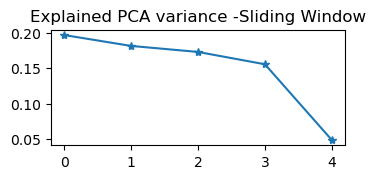

In [334]:
# PCA of the Sliding window point cloud
pca = PCA(n_components=5)
XS_pca = pca.fit(XS).transform(XS)
plt.figure(figsize = (3.8,1.5))
plt.plot(pca.explained_variance_ratio_, '-*') ;
plt.title('Explained PCA variance -Sliding Window');

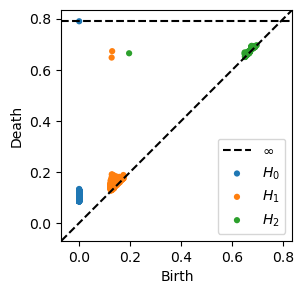

In [336]:
# Compute persistence diagrams of the pca vesion of the sliding window point cloud
res = ripser(XS_pca, maxdim=2, n_perm =500, coeff =13, thresh = 0.9)
dgms = res['dgms']
plt.figure(figsize = (3,3)) 
plot_diagrams(dgms)


In [379]:
#Applying Dreimac 

#topological data analysis
from dreimac import CircularCoords 
from persim import plot_diagrams
from dreimac import CircleMapUtils as CMU




C:\Users\mcedd\New folder\lib\site-packages\ripser\ripser.py:253: UserWarning:

The input point cloud has more columns than rows; did you mean to transpose?



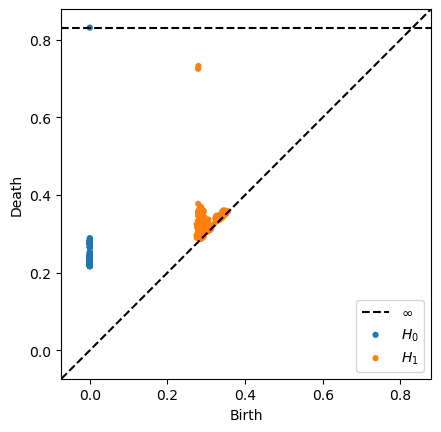

In [338]:
n_lands = 500

cc = CircularCoords(XS, n_landmarks=n_lands)

plot_diagrams(cc.dgms_)

In [380]:
# Get the circular coordinates at birth, and for the 2 cocycles with highest persistence
coho_classes = [0, 1]

circular_coords = []

for i in coho_classes:
    #perc: specifies the time in filtration to construct the coordinates 
    #cocyle_index: Picks a persistent homology class when the classes are ordered with respect to persistence
    theta = cc.get_coordinates(perc= 0, cocycle_idx=i)
    theta = CMU.to_sinebow(np.pi + CMU.center(theta))
    circular_coords.append(theta)

#Overall, this code snippet retrieves the circular coordinates associated with the specified cohomology classes and performs 
#some transformation on them. The resulting transformed circular coordinates are stored in the circular_coords list. The exact 
#purpose or use of these circular coordinates depends on the further context or subsequent code in the program.

In [381]:
# Plot data with 2 circular coordinates

fig = make_subplots(rows=1, cols=len(coho_classes), 
                    subplot_titles = tuple('Circ Coord '+str(i+1) for i in coho_classes),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes]])

for i, coord in enumerate(circular_coords):
    fig.add_trace(
        go.Scatter3d(x=XS_pca[:,0], y=XS_pca[:,1], z=XS_pca[:,2],   mode ='markers', 
        marker=dict(size = 2 , color =  circular_coords[i])),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)

fig.update_layout( showlegend=False )
fig.show()

In [382]:
#Gathering Angles from Circular Coordinates For First Oscillation
angles=[]
for coords in circular_coords[0]: 
    angle=np.arctan2(coords[1], coords[0])
    angles.append(angle)
    

In [383]:
#Sorting the Angles by their index then resorting our circular coordinates accordingly (First Oscillation)
angles=np.array(angles)
sortedidx=np.argsort(angles)


#sorted_circular_coords=circular_coords[0][sortedidx]

In [463]:
#Gathering Angles from Circular Coordinates for Second Oscillation
angles1=[]
for coords in circular_coords[1]:
    print(coords)
       
    #angle1=np.arctan2(coords[1], coords[0])
    #angles1.append(angle1)

[0.00801578 0.66876747 0.82321675]
[0.99736677 0.29569818 0.20693505]
[0.92387105 0.05839079 0.51773815]
[0.52757211 0.05386011 0.91856777]
[0.05562774 0.92068038 0.52369188]
[0.49696267 0.93452338 0.06851395]
[0.99983344 0.23890744 0.26125912]
[0.27361203 0.99927865 0.22710933]
[0.20435587 0.29861452 0.99702961]
[0.18765849 0.99430103 0.31804048]
[0.85154351 0.01631126 0.63214524]
[0.57814105 0.88862152 0.03323743]
[0.44983111 0.09425697 0.95591192]
[0.02374518 0.86998342 0.6062714 ]
[0.58047089 0.88713246 0.03239665]
[0.134065   0.38789347 0.97804153]
[0.8558574 0.6262491 0.0178935]
[0.91528265 0.53351266 0.05120469]
[0.8571106  0.62451897 0.01837043]
[0.03790528 0.56566491 0.89642981]
[0.60607537 0.0238063  0.87011833]
[0.96157294 0.10274187 0.43568519]
[0.9875903  0.35207861 0.16033109]
[3.26788635e-04 7.34183766e-01 7.65489445e-01]
[0.40129316 0.97384455 0.12486229]
[0.98616732 0.15576794 0.35806474]
[7.69921582e-01 7.29534415e-01 5.44003694e-04]
[0.00265194 0.79321254 0.70413552]

In [385]:
#Sorting the Angles by their index then resorting our circular coordinates accordingly (Second Oscillation)
angles1=np.array(angles1)
sortedidx1=np.argsort(angles1)

sorted_circular_coords1=circular_coords[1][sortedidx]

In [386]:
#Combining the sorted circular indexes for both oscillations into one array 
circular_coords=[]
circular_coords.append(sorted_circular_coords)
circular_coords.append(sorted_circular_coords1)

In [387]:
# Plot data with 2 circular coordinates

fig = make_subplots(rows=1, cols=len(coho_classes), 
                    subplot_titles = tuple('Circ Coord '+str(i+1) for i in coho_classes),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes]])

for i, coord in enumerate(circular_coords):
    fig.add_trace(
        go.Scatter3d(x=XS_pca[:,0], y=XS_pca[:,1], z=XS_pca[:,2],   mode ='markers', 
        marker=dict(size = 2 , color =  circular_coords[i])),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)

fig.update_layout( showlegend=False )
fig.show()